In [4]:
import cv2

In [1]:
pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /private/var/folders/s_/l93rxhln6_lgkp7cslyzlbmr0000gn/T/pip-req-build-5337mpn_
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /private/var/folders/s_/l93rxhln6_lgkp7cslyzlbmr0000gn/T/pip-req-build-5337mpn_
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36590 sha256=2403c39fff47c491af9512097c9bb2960c8f5a30cb1ae7611d3c3faee96a61f1
  Stored in directory: /private/var/folders/s_/l93rxhln6_lgkp7cslyzlbmr0000gn/T/pip-ephem-wheel-cache-r_3819p4/wheels/29/82/ff/04e2be9805a1cb48bec0b85b5a6da6b63f647645750a0e42d4
Successfully built segment_anything
Note: you may need to restart the kernel to use updated packages.


In [ ]:
image_path = "pixelvert_2.png"
image = cv2.imread(image_path)
cv2.imshow("image", image)

In [22]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
sam = sam_model_registry["vit_h"](checkpoint="/Users/timbusching/Downloads/sam_vit_h_4b8939.pth")
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)


/opt/anaconda3/lib/python3.12/site-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry

# Load the SAM model
sam = sam_model_registry["vit_h"](checkpoint="/Users/timbusching/Downloads/sam_vit_h_4b8939.pth")
mask_generator = SamAutomaticMaskGenerator(sam)



# Generate masks
masks = mask_generator.generate(image)


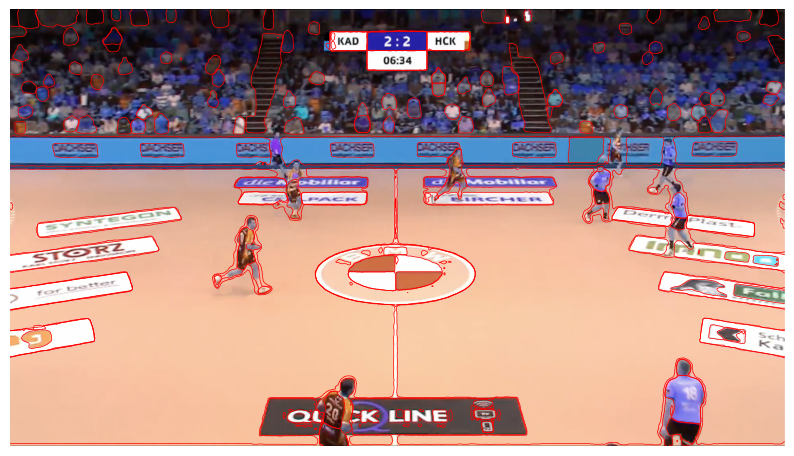

In [26]:
def visualize_masks(image, masks):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    
    for mask in masks:
        segmentation = mask['segmentation']
        if isinstance(segmentation, dict):
            # If segmentation is in RLE format, convert to binary mask
            segmentation = rle_to_mask(segmentation)
        plt.contour(segmentation, colors='r', linewidths=0.5)
    
    plt.axis('off')
    plt.show()

visualize_masks(image, masks)

In [27]:
for idx, mask in enumerate(masks):
    print(f"Mask {idx + 1}:")
    print(f"  Segmentation: {mask['segmentation']}")
    print(f"  Bounding Box: {mask['bbox']}")
    print(f"  Area: {mask['area']}")
    print(f"  Predicted IoU: {mask['predicted_iou']}")
    print(f"  Point Coordinates: {mask['point_coords']}")
    print(f"  Stability Score: {mask['stability_score']}")
    print(f"  Crop Box: {mask['crop_box']}")
    print()

Mask 1:
  Segmentation: [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
  Bounding Box: [0, 546, 2663, 951]
  Area: 1900552
  Predicted IoU: 1.0094423294067383
  Point Coordinates: [[1789.875, 1478.53125]]
  Stability Score: 0.9557662606239319
  Crop Box: [0, 0, 2664, 1502]

Mask 2:
  Segmentation: [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
  Bounding Box: [0, 1064, 291, 130]
  Area: 24361
  Predicted IoU: 1.0027128458023071
  Point Coordinates: [[124.875, 1149.96875]]
  Stability Score: 0.9823761582374573
  Crop Box: [0, 0, 2664, 1502]

Mask 3:
  Segmentat